# 🍷 Wine Quality Dataset - Exploratory Data Analysis (EDA)

This notebook explores the **UCI Wine Quality dataset** (red wine) and visualizes relationships between its physicochemical properties and quality score and demonstrates a typical initial EDA step of building any machine learning model - understanding the data better.

**Dataset source:**  
P. Cortez, A. Cerdeira, F. Almeida, T. Matos and J. Reis.  
Modeling wine preferences by data mining from physicochemical properties.  
In Decision Support Systems, Elsevier, 47(4):547-553, 2009.

**Goals:**
- Understand the dataset shape and structure.
- Explore statistical summaries.
- Visualize distributions of features.
- Check correlations with wine quality.
- Spot any interesting patterns.


In [1]:
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns
from sklearn import datasets

In [2]:
# Display settings
pd.set_option("display.max_columns", None)
sns.set_theme(style="whitegrid")

In [3]:
wine = datasets.load_wine()

# Create a DataFrame
df = pd.DataFrame(wine.data, columns=wine.feature_names)
df["target"] = wine.target

df.head()

,alcohol,malic_acid,ash,alcalinity_of_ash,magnesium,total_phenols,flavanoids,nonflavanoid_phenols,proanthocyanins,color_intensity,hue,od280/od315_of_diluted_wines,proline,target
0,14.23,1.71,2.43,15.6,127.0,2.80,3.06,0.28,2.29,5.64,1.04,3.92,1065.0,0
1,13.20,1.78,2.14,11.2,100.0,2.65,2.76,0.26,1.28,4.38,1.05,3.40,1050.0,0
2,13.16,2.36,2.67,18.6,101.0,2.80,3.24,0.30,2.81,5.68,1.03,3.17,1185.0,0
3,14.37,1.95,2.50,16.8,113.0,3.85,3.49,0.24,2.18,7.80,0.86,3.45,1480.0,0
4,13.24,2.59,2.87,21.0,118.0,2.80,2.69,0.39,1.82,4.32,1.04,2.93,735.0,0


## 1. Dataset Overview

Let's check:
- Number of rows and columns.
- Column names and data types.
- Missing values.


In [4]:
print("Shape:", df.shape)
print("\nData types:\n", df.dtypes)
print("\nMissing values:\n", df.isna().sum())

Shape: (178, 14)

Data types:
 alcohol                         float64
malic_acid                      float64
ash                             float64
alcalinity_of_ash               float64
magnesium                       float64
total_phenols                   float64
flavanoids                      float64
nonflavanoid_phenols            float64
proanthocyanins                 float64
color_intensity                 float64
hue                             float64
od280/od315_of_diluted_wines    float64
proline                         float64
target                            int64
dtype: object

Missing values:
 alcohol                         0
malic_acid                      0
ash                             0
alcalinity_of_ash               0
magnesium                       0
total_phenols                   0
flavanoids                      0
nonflavanoid_phenols            0
proanthocyanins                 0
color_intensity                 0
hue                             0
od2

## 2. Statistical Summary

Checking descriptive statistics to understand the value ranges and distributions.


In [5]:
df.describe().T

,count,mean,std,min,25%,50%,75%,max
alcohol,178.0,13.000618,0.811827,11.03,12.3625,13.050,13.6775,14.83
malic_acid,178.0,2.336348,1.117146,0.74,1.6025,1.865,3.0825,5.80
ash,178.0,2.366517,0.274344,1.36,2.2100,2.360,2.5575,3.23
alcalinity_of_ash,178.0,19.494944,3.339564,10.60,17.2000,19.500,21.5000,30.00
magnesium,178.0,99.741573,14.282484,70.00,88.0000,98.000,107.0000,162.00
total_phenols,178.0,2.295112,0.625851,0.98,1.7425,2.355,2.8000,3.88
flavanoids,178.0,2.029270,0.998859,0.34,1.2050,2.135,2.8750,5.08
nonflavanoid_phenols,178.0,0.361854,0.124453,0.13,0.2700,0.340,0.4375,0.66
proanthocyanins,178.0,1.590899,0.572359,0.41,1.2500,1.555,1.9500,3.58
color_intensity,178.0,5.058090,2.318286,1.28,3.2200,4.690,6.2000,13.00


## 3. Distribution of Wine Quality Scores

The target variable `quality` is discrete, usually from 3 to 8 in this dataset.


/tmp/ipykernel_8188/1676621815.py:2: FutureWarning: 

Passing `palette` without assigning `hue` is deprecated and will be removed in v0.14.0. Assign the `x` variable to `hue` and set `legend=False` for the same effect.

  ax = sns.countplot(


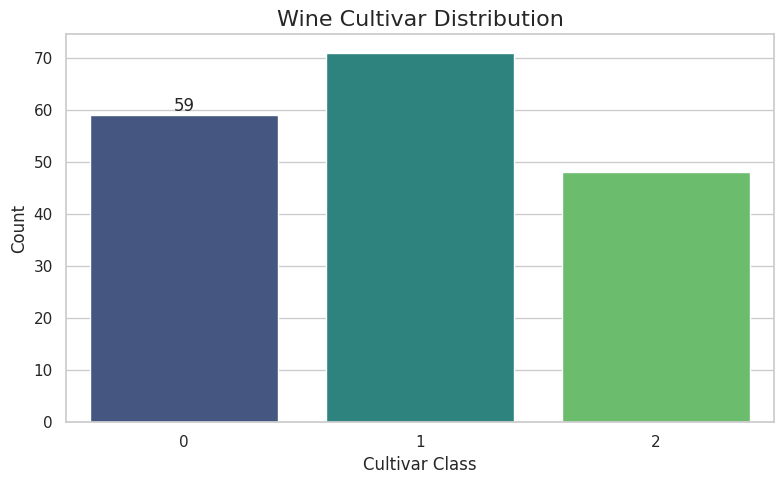

In [6]:
plt.figure(figsize=(8, 5))
ax = sns.countplot(
    x="target", data=df, palette="viridis", order=sorted(df["target"].unique())
)
ax.bar_label(ax.containers[0])
plt.title("Wine Cultivar Distribution", fontsize=16)
plt.xlabel("Cultivar Class")
plt.ylabel("Count")
plt.tight_layout()
plt.show()

## 4. Feature Distributions

We plot histograms for each numeric feature to see their distributions.


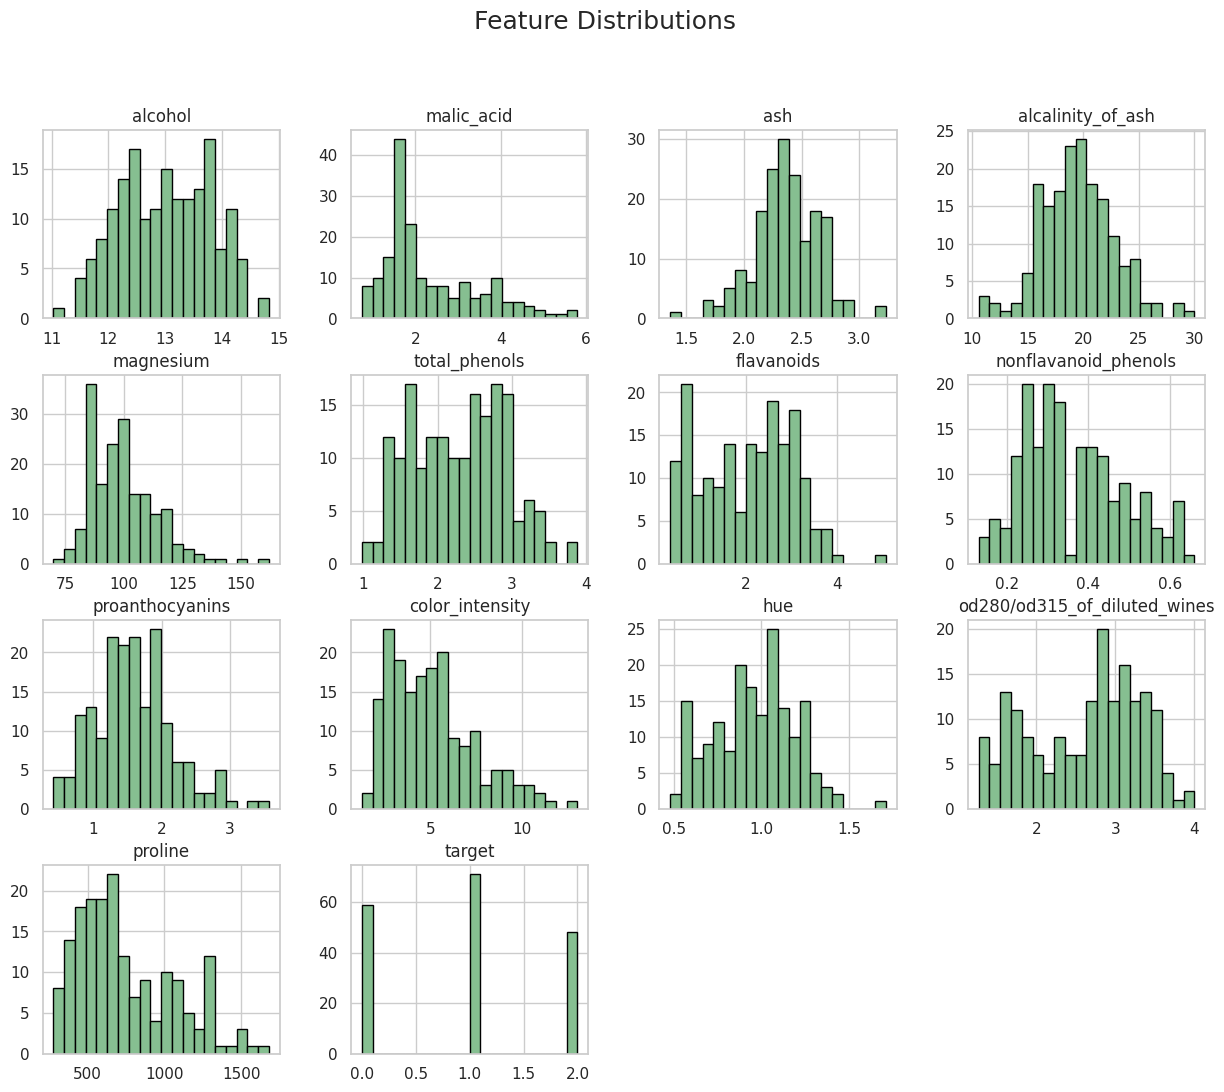

In [7]:
df.hist(bins=20, figsize=(15, 12), color="#86bf91", edgecolor="black")
plt.suptitle("Feature Distributions", fontsize=18)
plt.show()

## 5. Correlation Analysis

We calculate the Pearson correlation matrix and visualize it with a heatmap.


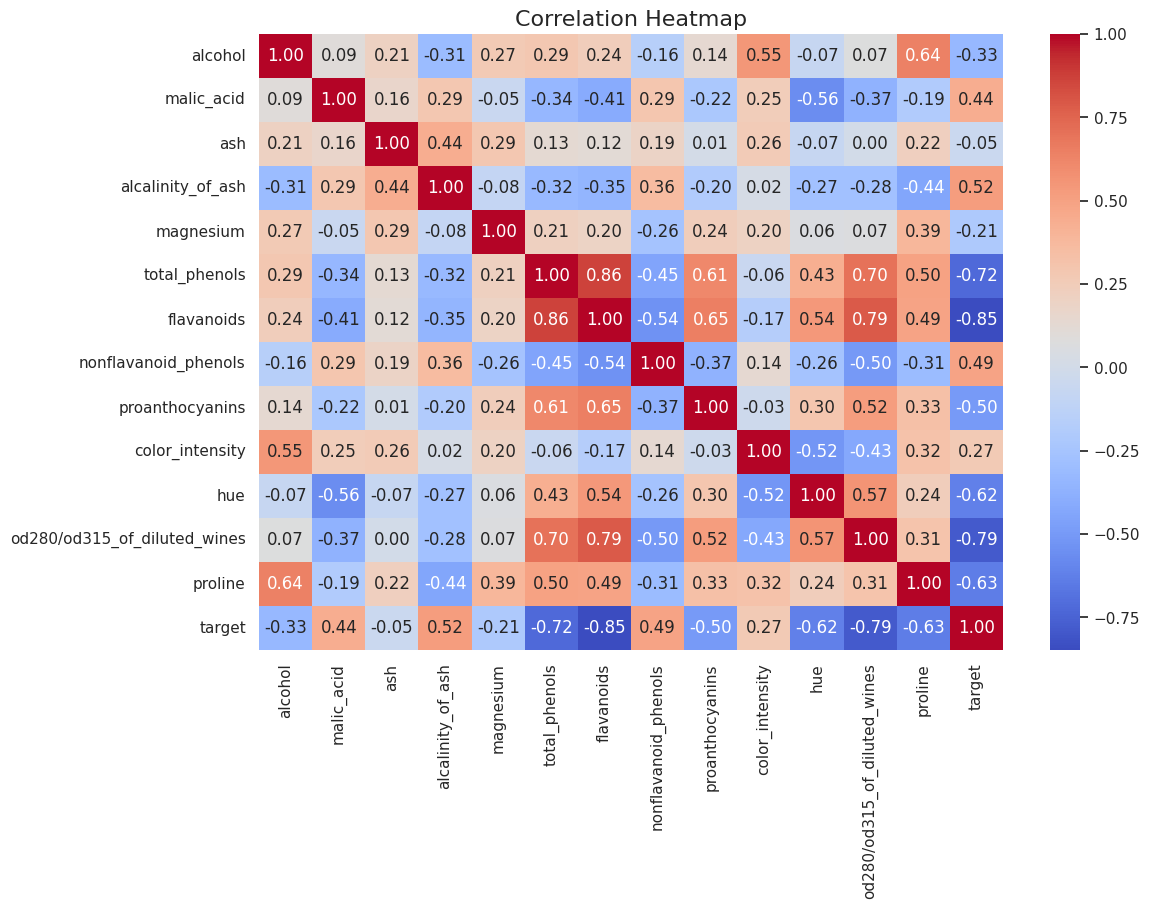

In [8]:
plt.figure(figsize=(12, 8))
corr = df.corr()
sns.heatmap(corr, annot=True, fmt=".2f", cmap="coolwarm", cbar=True)
plt.title("Correlation Heatmap", fontsize=16)
plt.show()

## 6. Relationship Between Features and Quality

Let's check how key features relate to the quality score.
We'll plot boxplots for a few selected features.


/tmp/ipykernel_8188/2870876194.py:6: FutureWarning: 

Passing `palette` without assigning `hue` is deprecated and will be removed in v0.14.0. Assign the `x` variable to `hue` and set `legend=False` for the same effect.

  sns.boxplot(x="target", y=feature, data=df, palette="Set2", ax=ax)
/tmp/ipykernel_8188/2870876194.py:6: FutureWarning: 

Passing `palette` without assigning `hue` is deprecated and will be removed in v0.14.0. Assign the `x` variable to `hue` and set `legend=False` for the same effect.

  sns.boxplot(x="target", y=feature, data=df, palette="Set2", ax=ax)
/tmp/ipykernel_8188/2870876194.py:6: FutureWarning: 

Passing `palette` without assigning `hue` is deprecated and will be removed in v0.14.0. Assign the `x` variable to `hue` and set `legend=False` for the same effect.

  sns.boxplot(x="target", y=feature, data=df, palette="Set2", ax=ax)
/tmp/ipykernel_8188/2870876194.py:6: FutureWarning: 

Passing `palette` without assigning `hue` is deprecated and will be removed in 

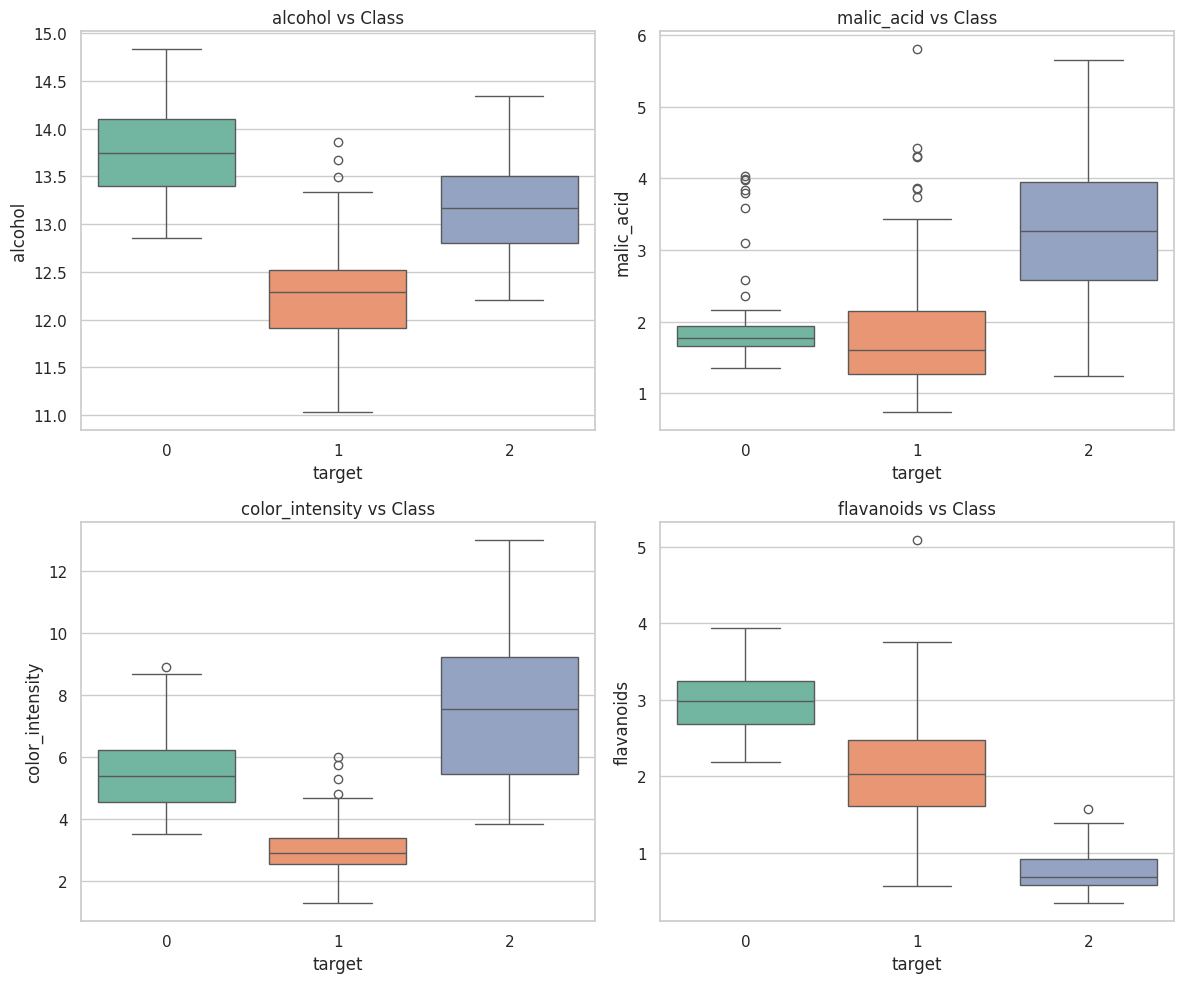

In [9]:
features_to_plot = ["alcohol", "malic_acid", "color_intensity", "flavanoids"]

fig, axes = plt.subplots(2, 2, figsize=(12, 10))

for ax, feature in zip(axes.flatten(), features_to_plot):
    sns.boxplot(x="target", y=feature, data=df, palette="Set2", ax=ax)
    ax.set_title(f"{feature} vs Class")

plt.tight_layout()
plt.show()

## 7. Pairplot of Selected Features

Visualizing pairwise relationships among features most correlated with quality.


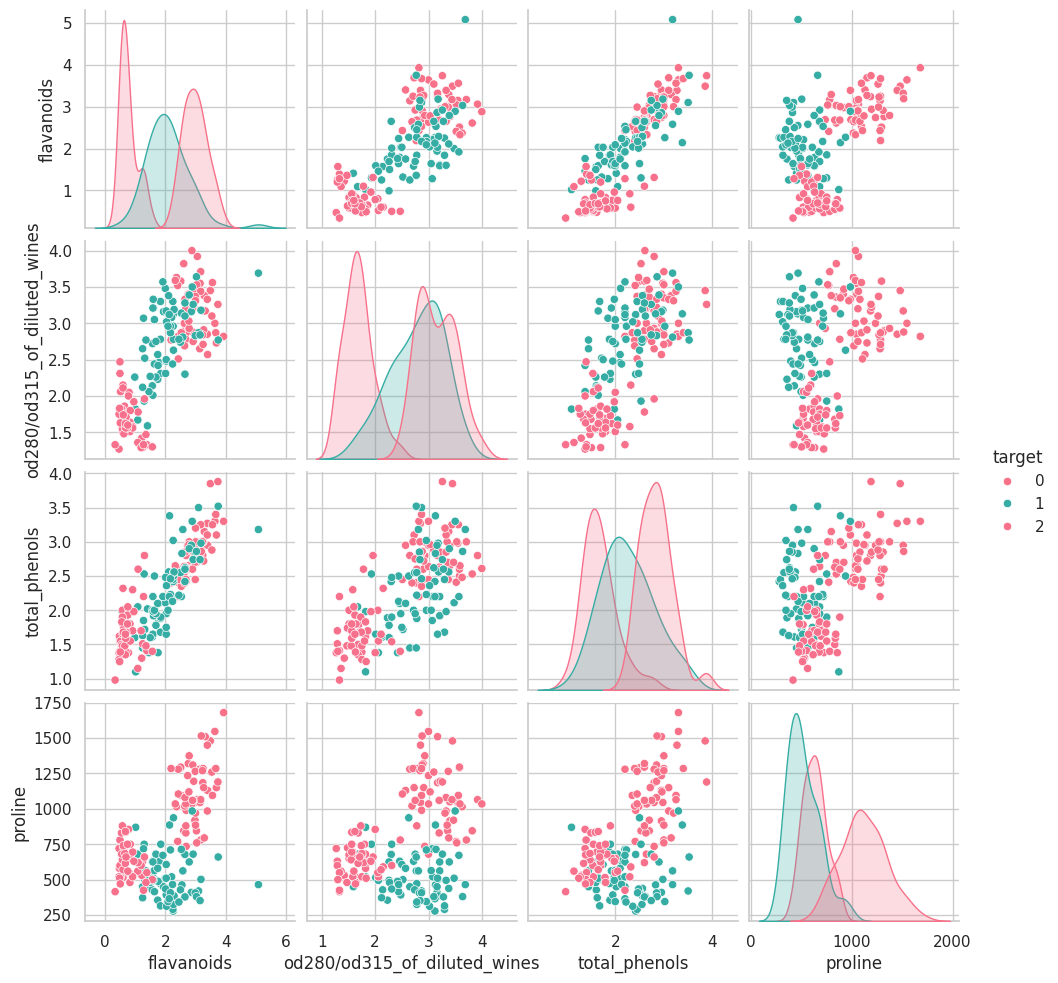

In [10]:
# Calculate correlations
corr = (
    df.drop(columns=["target"])
    .corrwith(df["target"])
    .abs()
    .sort_values(ascending=False)
)

# Top 4 correlated features with class
top_corr_features = corr.index[:4].tolist()

sns.pairplot(df[top_corr_features + ["target"]], hue="target", palette="husl")
plt.show()